In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

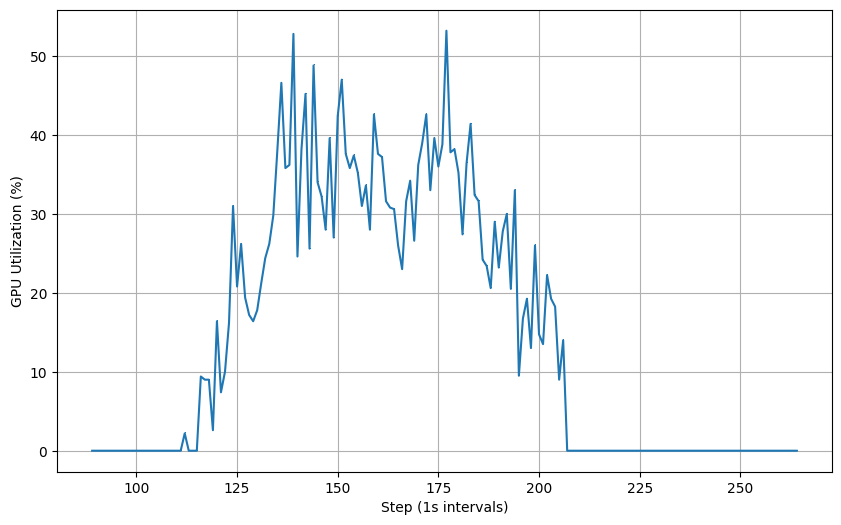

In [8]:
# GPU Utilization Auto

# Load all CSV files
csv_files_auto = glob.glob("./data/auto/*resources.csv")

dfs_auto = [pd.read_csv(file, usecols=["gpu_gpu_0"]) for file in csv_files_auto]

# clean
for i, df in enumerate(dfs_auto):
    dfs_auto[i]["gpu_gpu_0"] = (
        df["gpu_gpu_0"]
        .astype(str)
        .str.replace("%", "", regex=False)
        .replace("", 0)
        .astype(float)
    )


combined_auto = pd.concat(dfs_auto, axis=1)
combined_auto.fillna(0)
# print(combined)

means_auto = combined_auto.mean(axis=1)

plt.figure(figsize=(10,6))

plt.plot(means_auto.index, means_auto, marker=",")

plt.xlabel("Step (1s intervals)")
plt.ylabel("GPU Utilization (%)")
# plt.legend()
plt.grid(True)
plt.show()



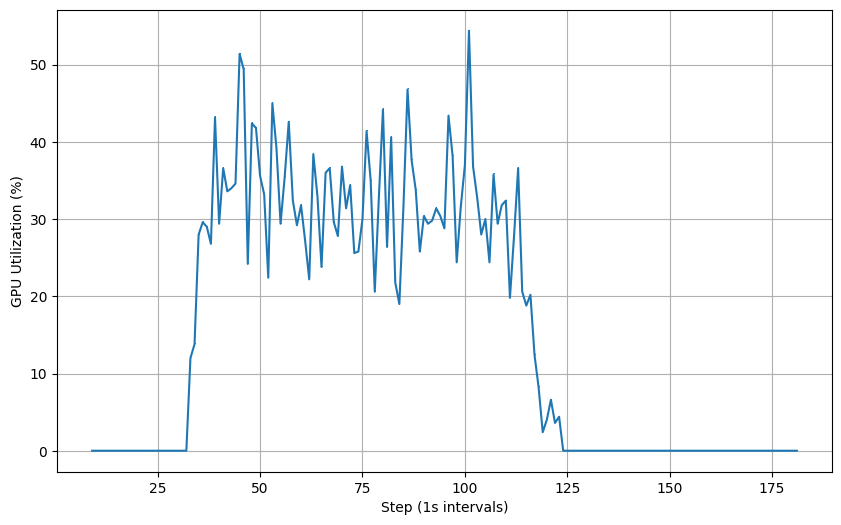

In [9]:
# GPU Utilization GPU

# Load all CSV files
csv_files_gpu = glob.glob("./data/gpu/*resources.csv")

dfs_gpu = [pd.read_csv(file, usecols=["gpu_gpu_0"]) for file in csv_files_gpu]

# clean
for i, df in enumerate(dfs_gpu):
    dfs_gpu[i]["gpu_gpu_0"] = (
        df["gpu_gpu_0"]
        .astype(str)
        .str.replace("%", "", regex=False)
        .replace("", 0)
        .astype(float)
    )


combined_gpu = pd.concat(dfs_gpu, axis=1)
combined_gpu.fillna(0)

means_gpu = combined_gpu.mean(axis=1)

plt.figure(figsize=(10,6))

plt.plot(means_gpu.index, means_gpu, marker=",")

plt.xlabel("Step (1s intervals)")
plt.ylabel("GPU Utilization (%)")
# plt.legend()
plt.grid(True)
plt.show()

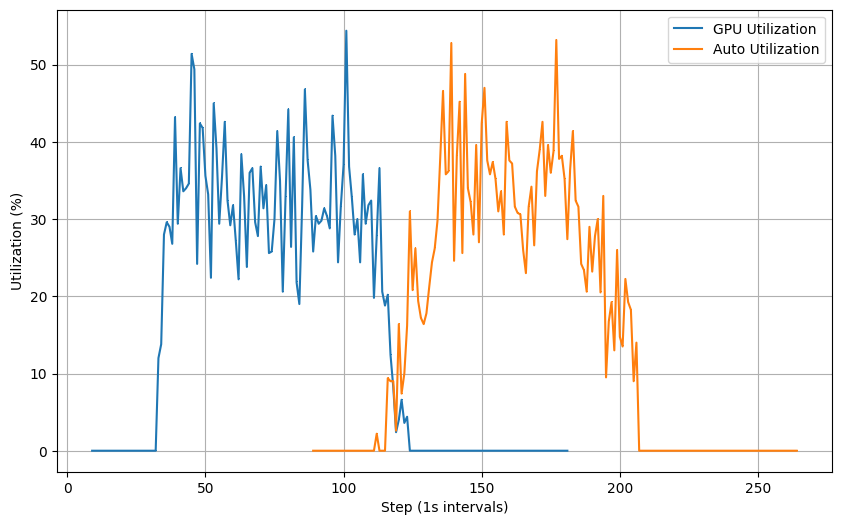

In [10]:
# Combine both GPU Utilization data for comparison

plt.figure(figsize=(10,6))

plt.plot(means_gpu.index, means_gpu, marker=",", label="GPU Utilization")
plt.plot(means_auto.index, means_auto, marker=",", label="Auto Utilization")

plt.xlabel("Step (1s intervals)")
plt.ylabel("Utilization (%)")
plt.legend()
plt.grid(True)
plt.show()
